In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [5]:
#loading data from csv file to a Pandas DataFrame
calories=pd.read_csv('calories.csv')

In [7]:
#print first five rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [13]:
exercise_data= pd.read_csv('exercise.csv')

In [15]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [19]:
#comibining the two dataframes
calories_data= pd.concat([exercise_data,calories['Calories']],axis=1)

In [21]:
#introducing NaN values
#10% of the total values are turned into NaN
np.random.seed(45)
missing_percentage=0.1
mask=np.random.rand(*calories_data.shape)<missing_percentage
calories_data[mask]=np.nan
print(calories_data)

          User_ID  Gender   Age  Height  Weight  Duration  Heart_Rate  \
0      14733363.0    male  68.0     NaN    94.0      29.0         NaN   
1      14861698.0  female  20.0   166.0    60.0      14.0        94.0   
2      11179863.0    male  69.0   179.0    79.0       5.0        88.0   
3             NaN  female  34.0   179.0    71.0      13.0       100.0   
4      17771927.0  female  27.0   154.0    58.0      10.0        81.0   
...           ...     ...   ...     ...     ...       ...         ...   
14995  15644082.0  female  20.0   193.0    86.0      11.0        92.0   
14996  17212577.0  female  27.0     NaN    65.0       6.0        85.0   
14997  17271188.0  female  43.0   159.0    58.0      16.0        90.0   
14998  18643037.0    male  78.0   193.0    97.0       2.0         NaN   
14999  11751526.0    male  63.0   173.0    79.0      18.0        92.0   

       Body_Temp  Calories  
0           40.8     231.0  
1           40.3      66.0  
2           38.7      26.0  
3      

In [23]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363.0,male,68.0,NaN,94.0,29.0,NaN,40.8,231.0
1,14861698.0,female,20.0,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863.0,male,69.0,179.0,79.0,5.0,88.0,38.7,26.0
3,NaN,female,34.0,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927.0,female,27.0,154.0,58.0,10.0,81.0,39.8,NaN


In [25]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [27]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     13461 non-null  float64
 1   Gender      13528 non-null  object 
 2   Age         13509 non-null  float64
 3   Height      13520 non-null  float64
 4   Weight      13489 non-null  float64
 5   Duration    13510 non-null  float64
 6   Heart_Rate  13479 non-null  float64
 7   Body_Temp   13482 non-null  float64
 8   Calories    13526 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.0+ MB


In [29]:
# checking for missing values, now there will be missing values as we have introduced them
calories_data.isnull().sum()

User_ID       1539
Gender        1472
Age           1491
Height        1480
Weight        1511
Duration      1490
Heart_Rate    1521
Body_Temp     1518
Calories      1474
dtype: int64

In [33]:
#calculating the mean of each column and filling the missing values using this
numeric_cols=calories_data.select_dtypes(include=[np.number])
column_means=numeric_cols.mean()
calories_data[numeric_cols.columns]=numeric_cols.fillna(column_means)
# Display the DataFrame with NaN values filled with the mean
print(calories_data)

            User_ID  Gender   Age      Height  Weight  Duration  Heart_Rate  \
0      1.473336e+07    male  68.0  174.511464    94.0      29.0   95.521775   
1      1.486170e+07  female  20.0  166.000000    60.0      14.0   94.000000   
2      1.117986e+07    male  69.0  179.000000    79.0       5.0   88.000000   
3      1.497528e+07  female  34.0  179.000000    71.0      13.0  100.000000   
4      1.777193e+07  female  27.0  154.000000    58.0      10.0   81.000000   
...             ...     ...   ...         ...     ...       ...         ...   
14995  1.564408e+07  female  20.0  193.000000    86.0      11.0   92.000000   
14996  1.721258e+07  female  27.0  174.511464    65.0       6.0   85.000000   
14997  1.727119e+07  female  43.0  159.000000    58.0      16.0   90.000000   
14998  1.864304e+07    male  78.0  193.000000    97.0       2.0   95.521775   
14999  1.175153e+07    male  63.0  173.000000    79.0      18.0   92.000000   

       Body_Temp    Calories  
0           40.8  23

In [35]:
#verifying that NaN values haave been eliminated
calories_data.isnull().sum()

User_ID          0
Gender        1472
Age              0
Height           0
Weight           0
Duration         0
Heart_Rate       0
Body_Temp        0
Calories         0
dtype: int64

In [37]:
#get some statistical measures about the data using describe function
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497528e+07,42.748982,174.511464,74.928312,15.544930,95.521775,40.024915,89.301715
std,2.726505e+06,16.108125,13.524514,14.245300,7.901024,9.083736,0.737448,59.264581
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.274676e+07,29.000000,165.000000,64.000000,9.000000,89.000000,39.700000,39.000000
50%,1.497528e+07,42.748982,174.511464,74.928312,15.544930,95.521775,40.100000,89.301715
75%,1.715817e+07,54.000000,184.000000,85.000000,22.000000,102.000000,40.600000,130.250000
max,1.999939e+07,79.000000,219.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [39]:
sns.set()

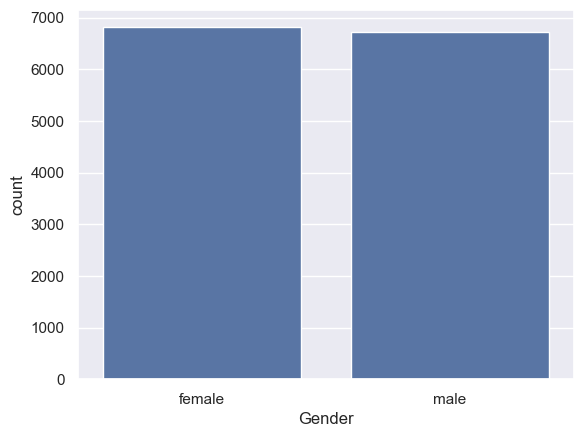

In [41]:
# DATA VISUALISATION
# Convert 'Gender' column, which is categorical data, to numerical data for ease of data manipulation and extraction
calories_data['Gender'] = calories_data['Gender'].astype('category')
#Creating a count plot for gender 
sns.countplot(x='Gender',data=calories_data)
# show the plot
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

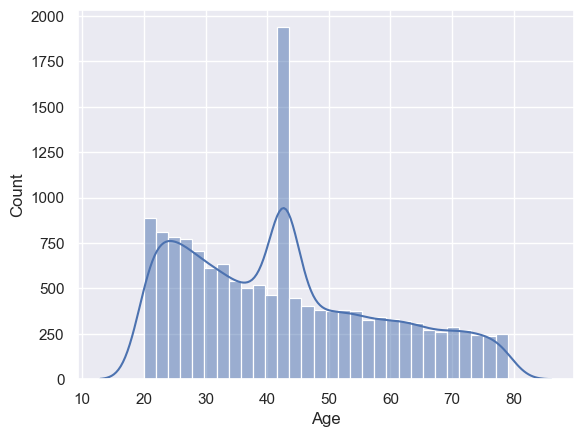

In [53]:
#finding the distribution of age column
sns.histplot(calories_data['Age'], kde=True, kde_kws=dict(cut=3))

In [57]:
# inferences:
#1. maximum density of age in our data set is 42
#2. minimum density of age in our data set is around 76
#3. age attribute is not uniformly distributed

C:\Users\SANYA\AppData\Local\Temp\ipykernel_32568\2919587295.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

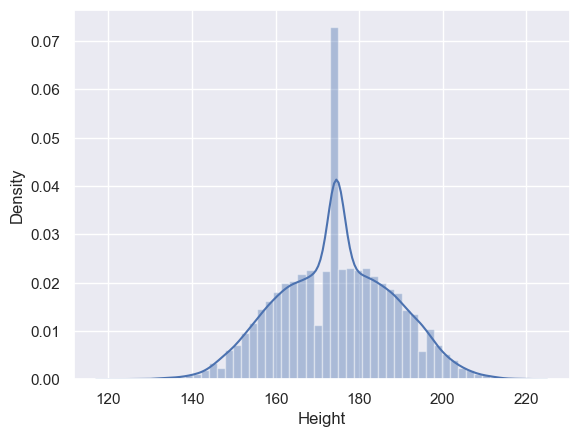

In [67]:
#finding distribution of height column
sns.distplot(calories_data['Height'])

In [69]:
#inferences:
#1: height attribute is approximately uniformly distributed
#2: maximum density of height in our data set is around 174-176
#3: minimum density of height in our data set is around the ends

C:\Users\SANYA\AppData\Local\Temp\ipykernel_32568\2402044656.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

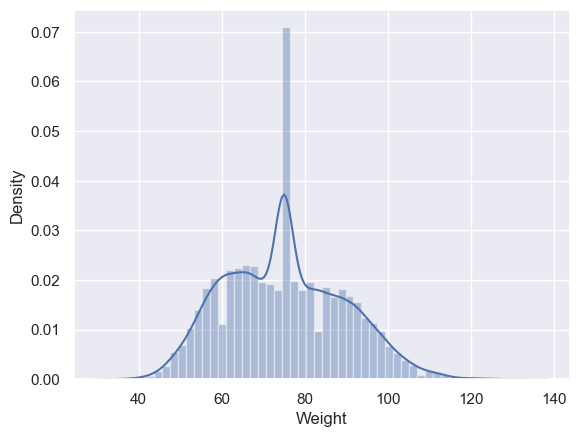

In [73]:
#finding the distribution of weight column
sns.distplot(calories_data['Weight'])

In [75]:
#inferences:
#1: weight attribute is approximately uniformly distributed
#2: maximum density of weight in our data set is around 74
#3: minimum density of weight in our data set is around the ends

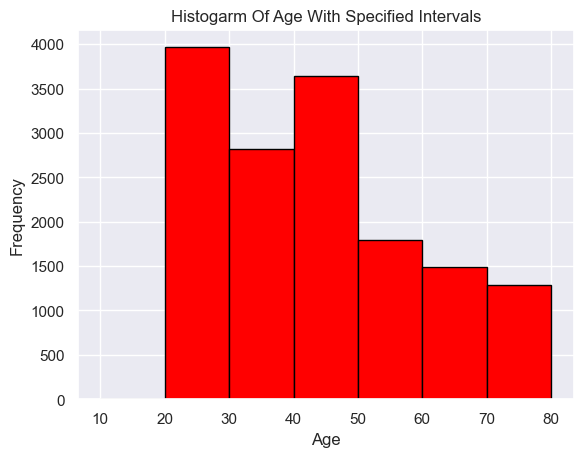

In [109]:
#show age frequency 
age_intervals=[10,20,30,40,50,60,70,80] # specify the age intervals you want
plt.hist(calories_data['Age'], bins=age_intervals,edgecolor='black', color='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogarm Of Age With Specified Intervals')
plt.show()

In [111]:
#inference: the maximum number of people lie between 20-30 age group

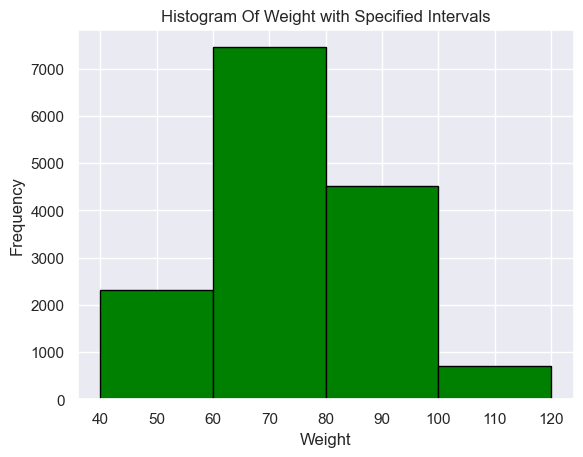

In [115]:
#showing weight frequency
weight_interval=[40,60,80,100,120] #Specify the intervals you want
plt.hist(calories_data['Weight'], bins=weight_interval, edgecolor='black',color='green')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Histogram Of Weight with Specified Intervals')
plt.show()

In [117]:
#inference: the maximum number of people lie between 60-80 weight

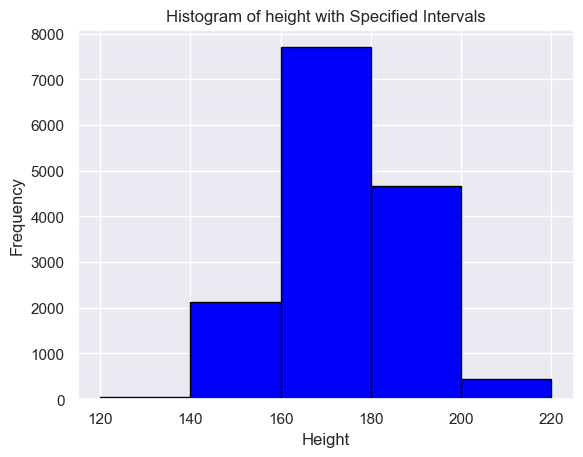

In [119]:
#showing height frequency
height_intervals = [120,140,160,180,200,220]  # Specify the intervals you want
plt.hist(calories_data['Height'], bins=height_intervals, edgecolor='black',color='blue')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Histogram of height with Specified Intervals')
plt.show()

In [121]:
#inference: the max number of people lie between 160-180 height

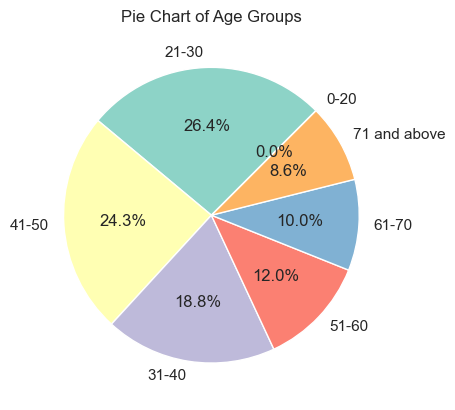

In [123]:

#making a pie chart of age groups that basically shows the percentage wise distribution of age
age_groups = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71 and above']
calories_data_age = calories_data
calories_data_age['age_group'] = pd.cut(calories_data['Age'], bins=[0, 20, 30, 40, 50, 60, 70, float('inf')],
                                    labels=age_groups, right=False)
# Calculate counts for each age group
age_group_counts = calories_data_age['age_group'].value_counts()
# Create a pie chart
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=45, colors=plt.cm.Set3.colors)
plt.title('Pie Chart of Age Groups')
plt.show()

In [125]:
#inferences:
# 1) this pie chart shows the percentage wise distribution of age groups of people in our data set.
# 2) the maximum number of people in our data set lie between 21-30, 26.4%.


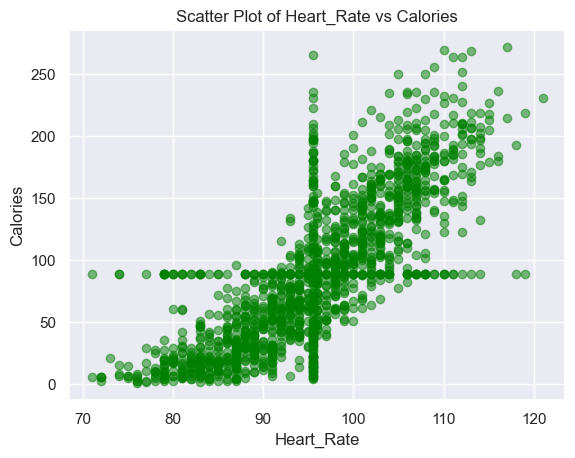

In [133]:
#making a scatter plot heart rate vs calories
plt.title('Scatter Plot of Heart_Rate vs Calories')
plt.xlabel('Heart_Rate')
plt.ylabel('Calories')
sampled_data = calories_data.sample(frac=0.1)
plt.scatter(sampled_data['Heart_Rate'], sampled_data['Calories'], alpha=0.5, c='green')
plt.show()

In [129]:
#inferences:
# 1)this plot shows a positive correlation between heart rate and calories.
# 2)the vertical line represents that max no. of people in our data set have heart rate around 95
# 3) the vertical line represents that max no. of people in our data set have calorie burnt around 95

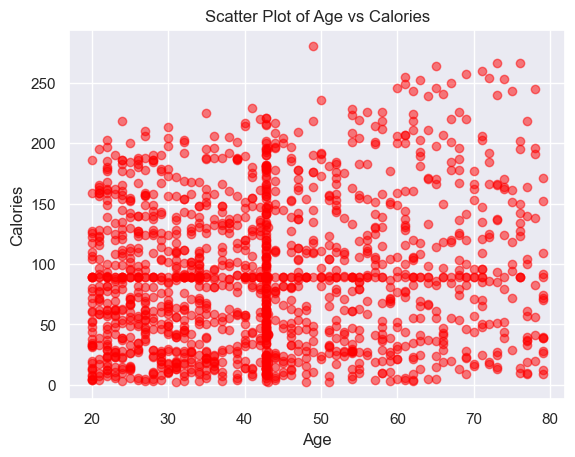

In [131]:
#making age vs calories
plt.title('Scatter Plot of Age vs Calories')
plt.xlabel('Age')
plt.ylabel('Calories')
sampled_data = calories_data.sample(frac=0.1)
plt.scatter(sampled_data['Age'], sampled_data['Calories'], alpha=0.5, c='red')
plt.show()

In [135]:
#inferences:
# 1)this plot shows no correlation between age and calories.
# 2)the vertical line represents that max no. of people in our data set have 42
# 3)the vertical line represents that max no. of people in our data set have calorie burnt around 95


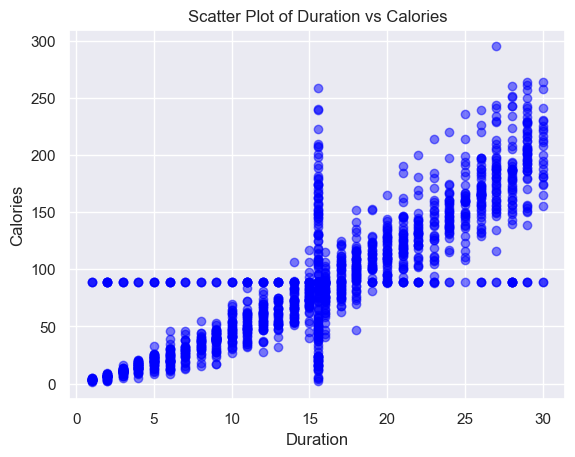

In [137]:
#making a scatter plot of duration of exercise vs calories
plt.title('Scatter Plot of Duration vs Calories')
plt.xlabel('Duration')
plt.ylabel('Calories')
sampled_data = calories_data.sample(frac=0.1)
plt.scatter(sampled_data['Duration'], sampled_data['Calories'], alpha=0.5, c='blue')
plt.show()

In [139]:
#inferences:
# 1)this plot shows a positive correlation between duration and calories.
# 2)the vertical line represents that max no. of people in our data set have duration of exercise around 16
# 3)the vertical line represents that max no. of people in our data set have calorie burnt around 95

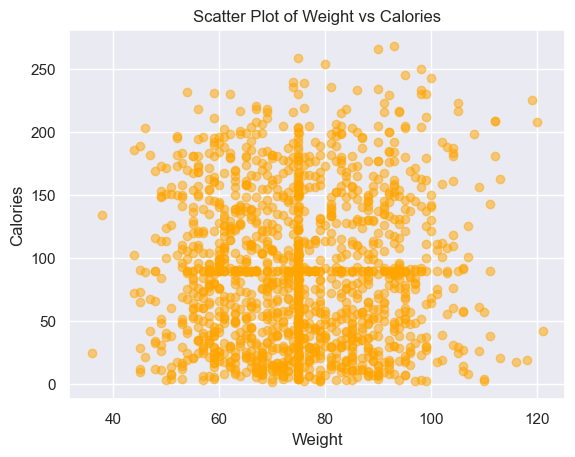

In [145]:
#making a scatter plot of weight vs calories
plt.title('Scatter Plot of Weight vs Calories')
plt.xlabel('Weight')
plt.ylabel('Calories')
sampled_data = calories_data.sample(frac=0.1)
plt.scatter(sampled_data['Weight'], sampled_data['Calories'], alpha=0.5, c='orange')
plt.show()

In [147]:
#inferences:
#this plot shows no correlation between weight and calories.
#the vertical line represents that max no. of people in our data set have weight around 60
#the vertical line represents that max no. of people in our data set have calorie burnt around 95
#The plus sign at the midpoint suggests that there is a direct and proportional relationship between x and y variables. As x increases, y also increases.


In [149]:
#Converting the classification data to categorical data for ease of data manipulation and insights
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)


C:\Users\SANYA\AppData\Local\Temp\ipykernel_32568\1065677451.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)
C:\Users\SANYA\AppData\Local\Temp\ipykernel_32568\1065677451.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)


In [151]:
#calories_data = calories_data.drop('age_group', axis = 1)
calories_data.head(70)
calories_data=calories_data.drop('age_group',axis=1)

In [153]:
#Finding the Correlation in the dataset
#1) Positive Correlation
#2) Negative Correlation
#3) No correlation

In [155]:
correlation = calories_data.corr()

<Axes: >

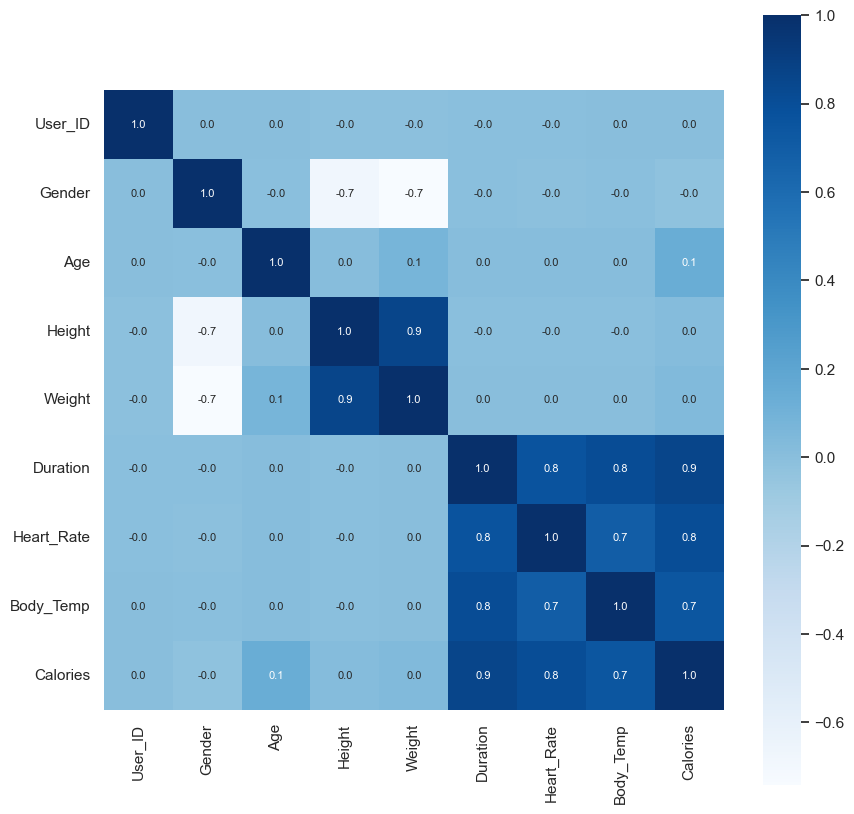

In [157]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [159]:
#Inferences:
#1)as we can see, the graph shows perfect correlation along diagonal, which is expected.
#2)height and weight are highly positively correlated.
#3)duration and body temperature are also correlated.

In [161]:
#we are now dropping the one of the two highly correlated attributes (out of weight and height, we are dropping weight)
#this is necessary to avoid data duplicacy
correlation_matrix = calories_data.corr()
# Specify the columns to drop
columns_to_drop = ['Weight']  # Replace with your actual column names
# Identify and drop specified columns
calories_data_filled_filtered = calories_data.drop(columns=columns_to_drop, axis=1)


In [163]:
correlation2=calories_data_filled_filtered.corr()

<Axes: >

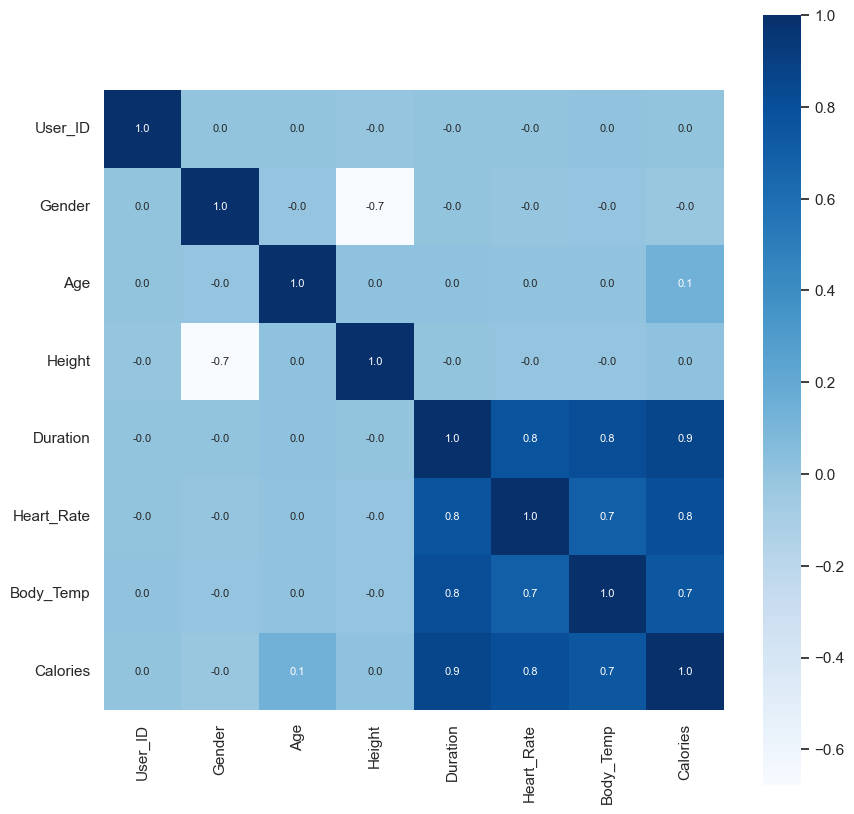

In [171]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation2, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [173]:
#now we have no highly correlated attributes

In [175]:
X = calories_data_filled_filtered.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [177]:
print(X)

      Gender   Age      Height  Duration  Heart_Rate  Body_Temp
0          0  68.0  174.511464      29.0   95.521775       40.8
1          1  20.0  166.000000      14.0   94.000000       40.3
2          0  69.0  179.000000       5.0   88.000000       38.7
3          1  34.0  179.000000      13.0  100.000000       40.5
4          1  27.0  154.000000      10.0   81.000000       39.8
...      ...   ...         ...       ...         ...        ...
14995      1  20.0  193.000000      11.0   92.000000       40.4
14996      1  27.0  174.511464       6.0   85.000000       39.2
14997      1  43.0  159.000000      16.0   90.000000       40.1
14998      0  78.0  193.000000       2.0   95.521775       38.3
14999      0  63.0  173.000000      18.0   92.000000       40.5

[15000 rows x 6 columns]


In [179]:
print(Y)

0        231.000000
1         66.000000
2         26.000000
3         71.000000
4         89.301715
            ...    
14995     45.000000
14996     23.000000
14997     75.000000
14998     11.000000
14999     98.000000
Name: Calories, Length: 15000, dtype: float64


In [181]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [183]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 6) (12000, 6) (3000, 6)


In [185]:
# Model Training
# XGBRegressor

In [221]:
# loading the model
model = XGBRegressor(enable_categorical = True)



In [203]:
#Evaluation
#Prediction on Test Data

In [225]:
test_data_prediction = model.predict(X_test)

In [243]:
print(test_data_prediction)

[124.829346 227.15594   38.489426 ... 139.83098   30.429655  88.44215 ]


In [233]:
# Mean Absolute Error

In [257]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [259]:
print("Mean Absolute Error =", mae)

Mean Absolute Error = 12.295665676570726
